In [1]:
import numpy as np
from scipy.sparse import lil_matrix
import scipy.sparse
import matplotlib.pyplot as plt
import networkx as nx
from tfgraph import *

### Trend Filtering:
$$
\beta = \underset{\beta \in \mathbb{R}^n}{\arg\min} \left( \frac{1}{2} \| y - \beta \|_2^2 + \lambda \| D^{(k+1)} \beta \|_1 \right)
$$
- λ ≥ 0 is a tuning parameter.
- $D^{(k+1)}$ is the discrete difference operator of order k + 1.
$$
D^{(1)} = 
\begin{pmatrix}
-1 & 1  & 0  & \cdots & 0 \\
 0 & -1 & 1  & \cdots & 0 \\
 \vdots & \vdots & \vdots & \ddots & \vdots \\
 0 & 0  & \cdots & -1 & 1 \\
\end{pmatrix}
$$
$
D^{(k+1) }= D^{(1)} D^{(k)}
$



### Trend Filtering on Graphs:
$$
\hat{\beta} = \underset{\beta \in \mathbb{R}^n}{\arg\min} \left( \frac{1}{2} \| y - \beta \|_2^2 + \lambda \| \Delta^{(k+1)} \beta \|_1 \right)
$$
The penalty matrix $\Delta^{(k+1)}$ is a suitably defined graph difference operator, of order $k + 1$.


##### Generate L, D, $\Delta$
- $
    \Delta^{(k+1)} = 
    \begin{cases} 
    (\Delta^{(1)})^\top \Delta^{(k)} = L^{\frac{k+1}{2}} & \text{for odd } k, \\
    \Delta^{(1)} \Delta^{(k)} = D L^{\frac{k}{2}} & \text{for even } k.
    \end{cases}
    $
- $L$: Graph Laplacian Matrix, $ L = D - A $.
    - $ D $: degree matrix, a diagonal matrix where the diagonal element $ D_{ii} $ represents the degree of node $ i $ (i.e., the number of edges connected to node $ i $ ).
    - $ A $: adjacency matrix, where $A_{ij} = 1 $ indicates that there is an edge between nodes $ i $ and $j$.

- Note that , order = "F" when flatten the image





$
D^{(k+1) }= D^{(1)} D^{(k)}
$
### Trend Filtering on Graphs:
$$
\hat{\beta} = \underset{\beta \in \mathbb{R}^n}{\arg\min} \left( \frac{1}{2} \| y - \beta \|_2^2 + \lambda \| \Delta^{(k+1)} \beta \|_1 \right)
$$
The penalty matrix $\Delta^{(k+1)}$ is a suitably defined graph difference operator, of order $k + 1$.


##### Generate L, D, $\Delta$
- $
    \Delta^{(k+1)} = 
    \begin{cases} 
    (\Delta^{(1)})^\top \Delta^{(k)} = L^{\frac{k+1}{2}} & \text{for odd } k, \\
    \Delta^{(1)} \Delta^{(k)} = D L^{\frac{k}{2}} & \text{for even } k.
    \end{cases}
    $
- $L$: Graph Laplacian Matrix, $ L = D - A $.
    - $ D $: degree matrix, a diagonal matrix where the diagonal element $ D_{ii} $ represents the degree of node $ i $ (i.e., the number of edges connected to node $ i $ ).
    - $ A $: adjacency matrix, where $A_{ij} = 1 $ indicates that there is an edge between nodes $ i $ and $j$.

- Note that , order = "C" when flatten the image





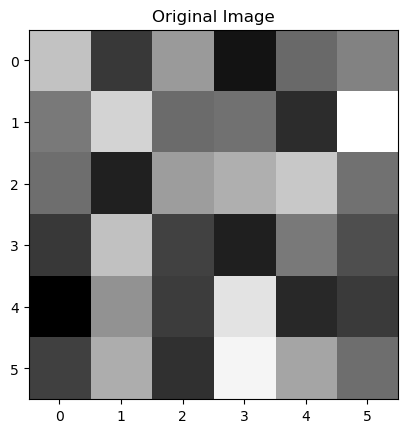

In [2]:
m=6
n=6
k=3
image = np.random.rand(m, n)  # 生成一个 mxn 的随机图片
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.show()

# Generate L, D, \Delta
L = generate_L(image)
D = generate_D(image)
delta=generate_delta(D, L, k)


In [3]:
def print_nonzero_columns(matrix):
    nonzero_columns = []
    for i, row in enumerate(matrix):
        nonzero_columns.append(np.nonzero(row)[0].tolist())
    return nonzero_columns

In [4]:
rows=[]
rows=print_nonzero_columns(delta)
rows #nonzero columns of delta

[[0, 1, 2, 6, 7],
 [0, 1, 6, 7, 12],
 [0, 1, 2, 3, 7, 8],
 [0, 1, 2, 6, 7, 8, 13],
 [1, 2, 3, 4, 8, 9],
 [1, 2, 3, 7, 8, 9, 14],
 [2, 3, 4, 5, 9, 10],
 [2, 3, 4, 8, 9, 10, 15],
 [3, 4, 5, 10, 11],
 [3, 4, 5, 9, 10, 11, 16],
 [4, 5, 10, 11, 17],
 [0, 1, 6, 7, 8, 12, 13],
 [0, 6, 7, 12, 13, 18],
 [1, 2, 6, 7, 8, 9, 13, 14],
 [1, 6, 7, 8, 12, 13, 14, 19],
 [2, 3, 7, 8, 9, 10, 14, 15],
 [2, 7, 8, 9, 13, 14, 15, 20],
 [3, 4, 8, 9, 10, 11, 15, 16],
 [3, 8, 9, 10, 14, 15, 16, 21],
 [4, 5, 9, 10, 11, 16, 17],
 [4, 9, 10, 11, 15, 16, 17, 22],
 [5, 10, 11, 16, 17, 23],
 [6, 7, 12, 13, 14, 18, 19],
 [6, 12, 13, 18, 19, 24],
 [7, 8, 12, 13, 14, 15, 19, 20],
 [7, 12, 13, 14, 18, 19, 20, 25],
 [8, 9, 13, 14, 15, 16, 20, 21],
 [8, 13, 14, 15, 19, 20, 21, 26],
 [9, 10, 14, 15, 16, 17, 21, 22],
 [9, 14, 15, 16, 20, 21, 22, 27],
 [10, 11, 15, 16, 17, 22, 23],
 [10, 15, 16, 17, 21, 22, 23, 28],
 [11, 16, 17, 22, 23, 29],
 [12, 13, 18, 19, 20, 24, 25],
 [12, 18, 19, 24, 25, 30],
 [13, 14, 18, 19, 20, 21, 

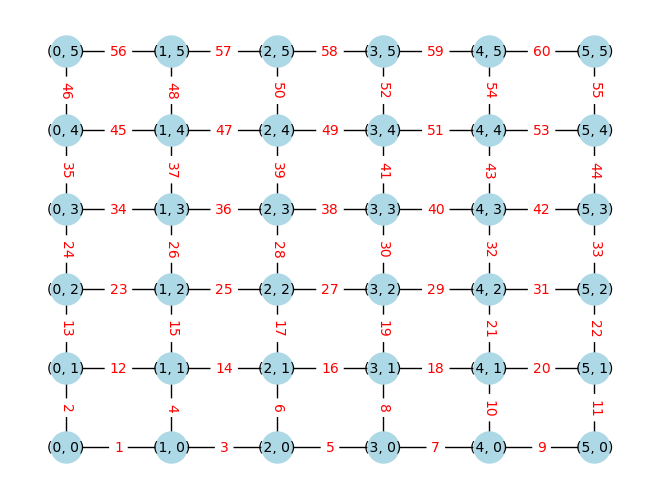

In [ ]:
G = nx.Graph()
for y in range(n):
    for x in range(m):
        G.add_node((x, y))

# add edges and labels
edge_id = 1
for y in range(n):
    for x in range(m):
        if x < m - 1:  
            G.add_edge((x, y), (x + 1, y), label=f'{edge_id}')
            edge_id += 1
        if y < n - 1:  
            G.add_edge((x, y), (x, y + 1), label=f'{edge_id}')
            edge_id += 1

pos = {(x, y): (x, -y) for x in range(m) for y in range(n)}
labels = nx.get_edge_attributes(G, 'label')

nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10, font_color='black')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='red')
# plot the image
plt.gca().invert_yaxis()
plt.show()


In [11]:

mods = [
    (1, 1), (3, 3), (5, 5), (7, 7),
    (3, 7), (5, 1), (7, 3), (1, 5)
]
class_edges = generate_classes_2(m, n,mods=mods) # generate_classes(m, n, G): in tfgraph.py
i=1
for edges in class_edges:
    print(f"Class {i}: Edges {edges}")
    i+=1

Class 1: Edges [0, 44, 26, 8, 52]
Class 2: Edges [2, 46, 28]
Class 3: Edges [22, 4, 48, 30]
Class 4: Edges [24, 6, 50]
Class 5: Edges [11, 55, 37, 19, 59]
Class 6: Edges [13, 56, 39]
Class 7: Edges [33, 15, 57, 41]
Class 8: Edges [35, 17, 58]
Class 9: Edges [1, 9, 27, 45, 53]
Class 10: Edges [12, 20, 38]
Class 11: Edges [5, 23, 31, 49]
Class 12: Edges [16, 34, 42]
Class 13: Edges [3, 10, 29, 47, 54]
Class 14: Edges [14, 21, 40]
Class 15: Edges [7, 25, 32, 51]
Class 16: Edges [18, 36, 43]


In [12]:
class_edges

[[0, 44, 26, 8, 52],
 [2, 46, 28],
 [22, 4, 48, 30],
 [24, 6, 50],
 [11, 55, 37, 19, 59],
 [13, 56, 39],
 [33, 15, 57, 41],
 [35, 17, 58],
 [1, 9, 27, 45, 53],
 [12, 20, 38],
 [5, 23, 31, 49],
 [16, 34, 42],
 [3, 10, 29, 47, 54],
 [14, 21, 40],
 [7, 25, 32, 51],
 [18, 36, 43]]

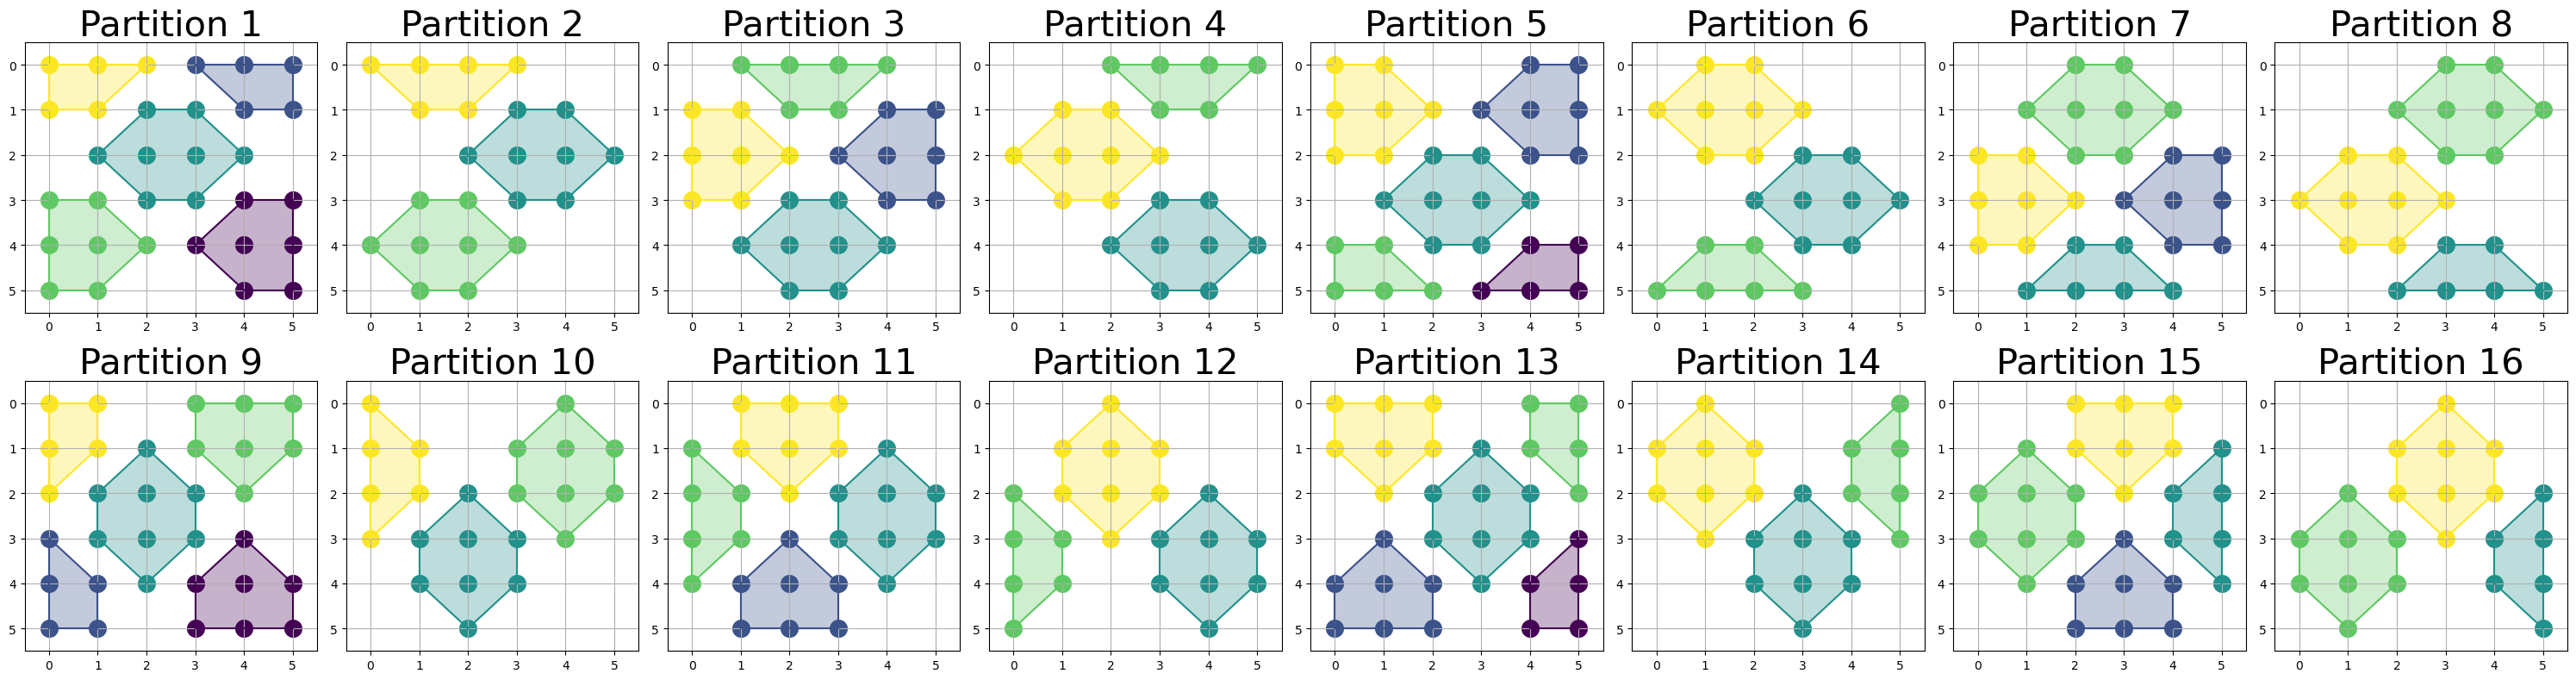

In [13]:
fig, axs = plt.subplots(2, 8, figsize=(30, 8))  
colors = plt.cm.viridis(np.linspace(1, 0, max(len(indices) for indices in class_edges)))
for i, (ax, indices) in enumerate(zip(axs.flat, class_edges)):
    plot_single_partition(ax, rows, indices, i + 1, colors,m,n)

plt.tight_layout()
plt.show()


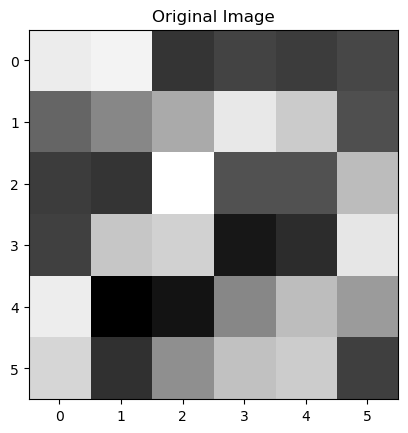

In [14]:
m=6
n=6
k=1
image = np.random.rand(m, n)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.show()

# Generate L, D, \Delta
L = generate_L(image)
D = generate_D(image)
delta=generate_delta(D, L, k)

In [16]:
rows=[]
rows=print_nonzero_columns(delta)

In [17]:
from collections import Counter
all_elements = [item for sublist in rows for item in sublist]
counter = Counter(all_elements)

most_common = counter.most_common(1)
print(f"most common elements: {most_common[0][0]}, times: {most_common[0][1]}")

most common elements: 7, times: 4


In [18]:
mods = [
    (1, 1), (1,3),(3,1),(3,3)
]
class_edges,classification = generate_classes_0(m, n,mods=mods) # generate_classes(m, n, G): in tfgraph.py
i=1
for edges in class_edges:
    print(f"Class {i}: Edges {edges}")
    
    i+=1
for i, class_points in enumerate(classification):
    print(f"Class {i + 1}: Points {class_points}")

Class 1: Edges [0, 22, 44, 13, 35, 56, 4, 26, 48, 17, 39, 58, 8, 30, 52]
Class 2: Edges [11, 33, 55, 2, 24, 46, 15, 37, 57, 6, 28, 50, 19, 41, 59]
Class 3: Edges [1, 23, 45, 14, 36, 5, 27, 49, 18, 40, 9, 31, 53]
Class 4: Edges [12, 34, 3, 25, 47, 16, 38, 7, 29, 51, 20, 42, 10, 32, 54]
Class 1: Points [(0, 0), (0, 2), (0, 4), (1, 1), (1, 3), (1, 5), (2, 0), (2, 2), (2, 4), (3, 1), (3, 3), (3, 5), (4, 0), (4, 2), (4, 4), (5, 1), (5, 3), (5, 5)]
Class 2: Points [(0, 1), (0, 3), (0, 5), (1, 0), (1, 2), (1, 4), (2, 1), (2, 3), (2, 5), (3, 0), (3, 2), (3, 4), (4, 1), (4, 3), (4, 5)]
Class 3: Points [(0, 0), (0, 2), (0, 4), (1, 1), (1, 3), (1, 5), (2, 0), (2, 2), (2, 4), (3, 1), (3, 3), (3, 5), (4, 0), (4, 2), (4, 4)]
Class 4: Points [(0, 1), (0, 3), (0, 5), (1, 0), (1, 2), (1, 4), (2, 1), (2, 3), (2, 5), (3, 0), (3, 2), (3, 4), (4, 1), (4, 3), (4, 5), (5, 0), (5, 2), (5, 4)]


In [96]:
class_edges = [
    [0, 22, 44, 13, 35, 56, 4, 26, 48, 17, 39, 58, 8, 30, 52],
    [11, 33, 55, 2, 24, 46, 15, 37, 57, 6, 28, 50, 19, 41, 59],
    [1, 23, 45, 14, 36, 5, 27, 49, 18, 40, 9, 31, 53,43,21],
    [12, 34, 3, 25, 47, 16, 38, 7, 29, 51, 20, 42, 10, 32, 54]
]


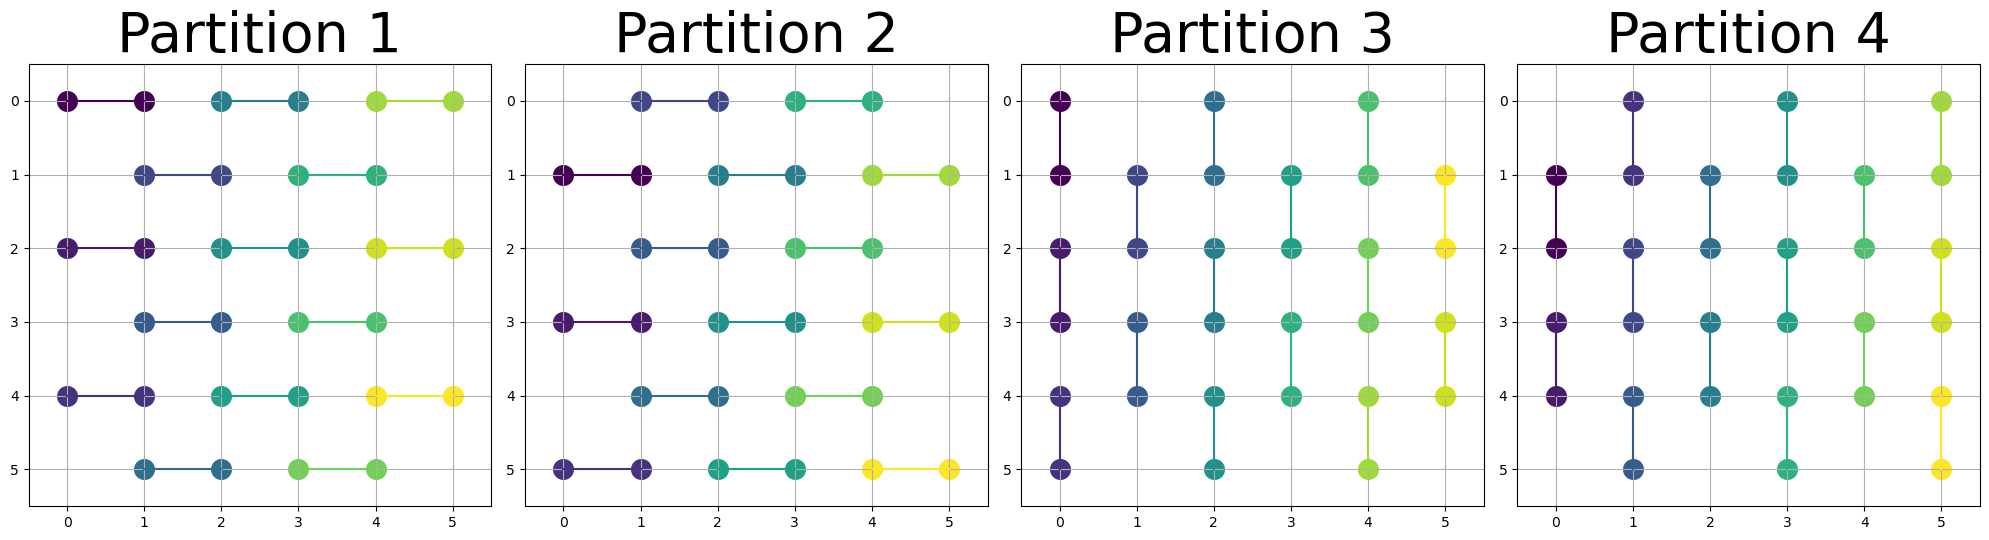

In [99]:
fig, axs = plt.subplots(1,4, figsize=(20, 5.5))  
# colors = plt.cm.get_cmap('tab10', max(len(indices) for indices in class_edges))  
colors = plt.cm.viridis(np.linspace(0, 1, max(len(indices) for indices in class_edges)))

for i, (ax, indices) in enumerate(zip(axs.flat, class_edges)):
    plot_single_partition(ax, rows, indices, i + 1, colors,m,n)

plt.tight_layout()
plt.show()

In [126]:
# print the partition results 
from scipy.spatial import ConvexHull
def plot_single_partition(ax, rows, indices, partition_number, colors, m, n):
    for idx, row_index in enumerate(indices):
        row = rows[row_index]
        nodes = []
        for col in row:
            x = col % n  # 计算列位置
            y = col // n  # 计算行位置
            ax.scatter(x, y, color=colors[idx], s=200, label=f'Row {row_index}' if col == row[0] else "")
            nodes.append((x, y))
        
        # 如果节点数量足以构成凸包（至少3个点）
        if len(nodes) > 2:
            nodes = np.array(nodes)  # 转换列表为NumPy数组，用于凸包计算
            hull = ConvexHull(nodes)
            # 绘制凸包
            for simplex in hull.simplices:
                ax.plot(nodes[simplex, 0], nodes[simplex, 1], color=colors[idx])
            # 填充凸包
            ax.fill(nodes[hull.vertices,0], nodes[hull.vertices,1], color=colors[idx], alpha=0.3)
        if len(nodes) == 2:
            ax.plot([nodes[0][0], nodes[1][0]], [nodes[0][1], nodes[1][1]], color=colors[idx])

    ax.set_xlim(-0.5, n-0.5)
    ax.set_ylim(-0.5, m-0.5)
    ax.invert_yaxis()
    ax.set_xticks(np.arange(n))
    ax.set_yticks(np.arange(m))
    ax.grid(True)

    # 合并图例
    # handles, labels = ax.get_legend_handles_labels()
    # by_label = dict(zip(labels, handles))
    # ax.legend(by_label.values(), by_label.keys(), loc='upper right', fontsize='small')
    ax.set_title(f"Partition {partition_number}",fontsize=30)

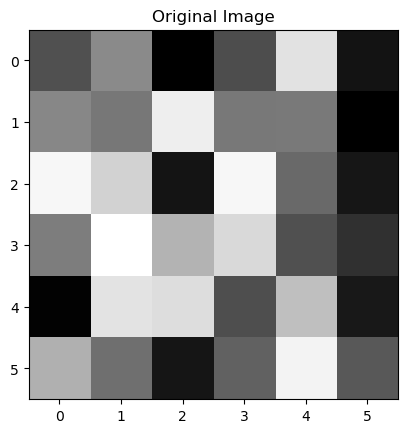

In [19]:
m=6
n=6
k=2
image = np.random.rand(m, n)  # 生成一个 mxn 的随机图片
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.show()

# Generate L, D, \Delta
L = generate_L(image)
D = generate_D(image)
delta=generate_delta(D, L, k)

In [20]:
rows=[]
rows=print_nonzero_columns(delta)
rows #nonzero columns of delta

[[0, 1, 6],
 [0, 1, 2, 7],
 [1, 2, 3, 8],
 [2, 3, 4, 9],
 [3, 4, 5, 10],
 [4, 5, 11],
 [0, 6, 7, 12],
 [1, 6, 7, 8, 13],
 [2, 7, 8, 9, 14],
 [3, 8, 9, 10, 15],
 [4, 9, 10, 11, 16],
 [5, 10, 11, 17],
 [6, 12, 13, 18],
 [7, 12, 13, 14, 19],
 [8, 13, 14, 15, 20],
 [9, 14, 15, 16, 21],
 [10, 15, 16, 17, 22],
 [11, 16, 17, 23],
 [12, 18, 19, 24],
 [13, 18, 19, 20, 25],
 [14, 19, 20, 21, 26],
 [15, 20, 21, 22, 27],
 [16, 21, 22, 23, 28],
 [17, 22, 23, 29],
 [18, 24, 25, 30],
 [19, 24, 25, 26, 31],
 [20, 25, 26, 27, 32],
 [21, 26, 27, 28, 33],
 [22, 27, 28, 29, 34],
 [23, 28, 29, 35],
 [24, 30, 31],
 [25, 30, 31, 32],
 [26, 31, 32, 33],
 [27, 32, 33, 34],
 [28, 33, 34, 35],
 [29, 34, 35]]

In [21]:
from collections import Counter
all_elements = [item for sublist in rows for item in sublist]
counter = Counter(all_elements)
most_common = counter.most_common(1)
print(f"most common elements {most_common[0][0]}, times: {most_common[0][1]}")

most common elements 7, times: 5


In [22]:
mods = [
    (0, 0), (2,1),(4,2),(1,3),(3,4)
]
class_edges = generate_classes_1(m, n,mods=mods) # generate_classes(m, n, G): in tfgraph.py
i=1
for edges in class_edges:
    print(f"Class {i}: Edges {edges}")
    i+=1

Class 1: Edges [0, 30, 19, 8, 27, 16, 5, 35]
Class 2: Edges [12, 1, 31, 20, 9, 28, 17]
Class 3: Edges [24, 13, 2, 32, 21, 10, 29]
Class 4: Edges [6, 25, 14, 3, 33, 22, 11]
Class 5: Edges [18, 7, 26, 15, 4, 34, 23]


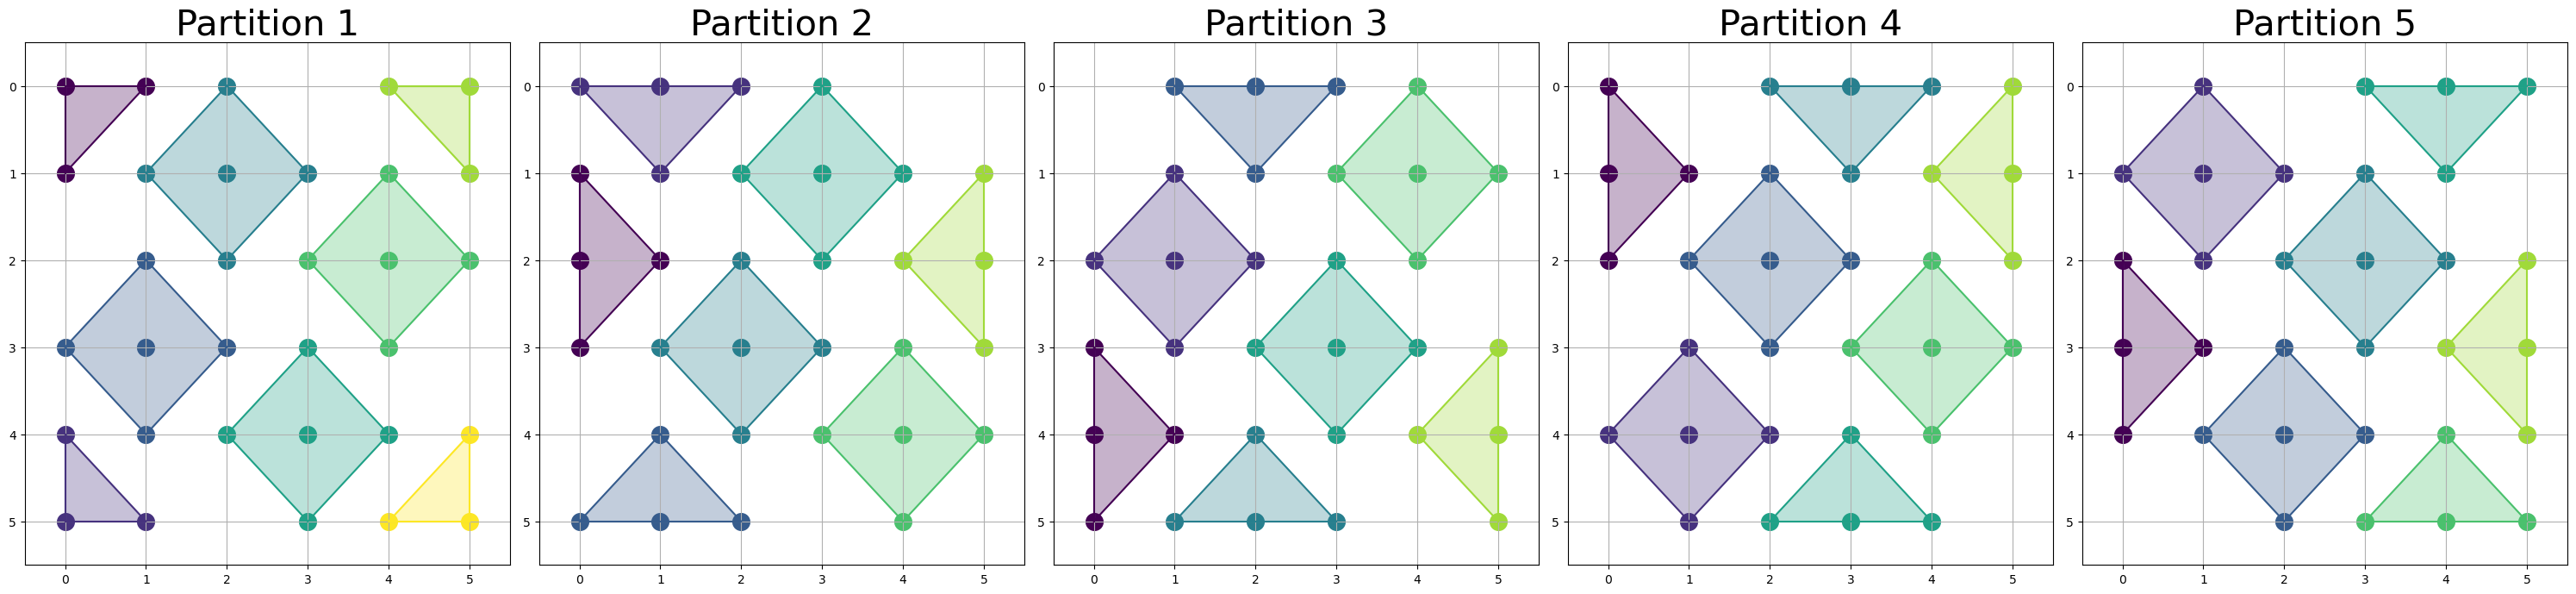

In [23]:
fig, axs = plt.subplots(1,5, figsize=(30, 7))  
colors = plt.cm.viridis(np.linspace(0, 1, max(len(indices) for indices in class_edges)))

for i, (ax, indices) in enumerate(zip(axs.flat, class_edges)):
    plot_single_partition(ax, rows, indices, i + 1, colors,m,n)

plt.tight_layout()
plt.show()